In [14]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np
import torch
import torchvision
import tqdm
from torch import nn
from torchvision import transforms as T
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

In [16]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [17]:
from torchvision.datasets import CIFAR10

In [18]:
train_transform = T.Compose([
    T.RandomCrop((32, 32), padding=4),
    T.RandomHorizontalFlip(0.5),
    T.ColorJitter(contrast=0.25),
    T.ToTensor(),
    T.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
])
val_transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
])

train_dataset = CIFAR10("./data/", download=True, train=True, transform=train_transform)
val_dataset = CIFAR10("./data/", download=True, train=False, transform=val_transform)

Files already downloaded and verified
Files already downloaded and verified


In [19]:
train_dataloader = DataLoader(train_dataset, batch_size=200, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=200)

In [20]:
from src.utils import set_random_seed

In [21]:
from src.utils import train, predict

In [22]:
from src.layers.tt import TT

set_random_seed(12345)
model = nn.Sequential(
    nn.Sequential(
        nn.Conv2d(3, 64, (3, 3), padding="same"),
        nn.BatchNorm2d(64),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Conv2d(64, 64, (3, 3), padding="same"),
        nn.BatchNorm2d(64),
        nn.ReLU(),
    ),
    nn.MaxPool2d((3, 3), stride=(2, 2), padding=(1, 1)),
    nn.Sequential(
        nn.Conv2d(64, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Conv2d(128, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.MaxPool2d((3, 3), stride=(2, 2), padding=(1, 1)),
    nn.Sequential(
        nn.Conv2d(128, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Conv2d(128, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Flatten(),
        TT((2, 2, 2, 4, 4, 4, 4, 4), (2, 2, 2, 2, 2, 2, 2, 4), (8,) * 7),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )
)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)
criterion = nn.CrossEntropyLoss(reduction="mean")
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 30, gamma=0.1, verbose=True)
# scheduler = None
n_epochs = 100

device = "cuda:0" if torch.cuda.is_available() else torch.device("cpu")
model = model.to(device)
# device = "cpu"

Adjusting learning rate of group 0 to 1.0000e-01.


In [23]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels.to("cpu"), true_labels.to("cpu"))
print("tests passed")

tests passed


In [24]:
accuracies = train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler, plot=False)

  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 0, Train loss: 1.5472230129241944, Validation loss: 1.2375319004058838, Validation accuracy: 0.5838


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 1, Train loss: 0.9934666893482208, Validation loss: 1.1542749404907227, Validation accuracy: 0.6305


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 2, Train loss: 0.7852014772891999, Validation loss: 0.7442359924316406, Validation accuracy: 0.7406


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 3, Train loss: 0.6809417861700058, Validation loss: 0.6896840333938599, Validation accuracy: 0.7683


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 4, Train loss: 0.6110696170330048, Validation loss: 0.6095118522644043, Validation accuracy: 0.7892


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 5, Train loss: 0.558164829492569, Validation loss: 0.6538379788398743, Validation accuracy: 0.7831


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 6, Train loss: 0.5107138558626175, Validation loss: 0.6442480683326721, Validation accuracy: 0.786


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 7, Train loss: 0.4779683643579483, Validation loss: 0.5256498456001282, Validation accuracy: 0.8287


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 8, Train loss: 0.4450460811853409, Validation loss: 0.5529080629348755, Validation accuracy: 0.8221


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 9, Train loss: 0.41224272263050077, Validation loss: 0.5893754959106445, Validation accuracy: 0.8106


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 10, Train loss: 0.39302553683519365, Validation loss: 0.6017650961875916, Validation accuracy: 0.8102


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 11, Train loss: 0.36926829063892364, Validation loss: 0.4758906066417694, Validation accuracy: 0.8414


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 12, Train loss: 0.3456754843592644, Validation loss: 0.4551328122615814, Validation accuracy: 0.8532


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 13, Train loss: 0.32908670818805696, Validation loss: 0.45666322112083435, Validation accuracy: 0.8502


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 14, Train loss: 0.3166420161128044, Validation loss: 0.4582640528678894, Validation accuracy: 0.8536


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 15, Train loss: 0.30296181052923205, Validation loss: 0.44207802414894104, Validation accuracy: 0.8561


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 16, Train loss: 0.28369062960147856, Validation loss: 0.500450074672699, Validation accuracy: 0.8387


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 17, Train loss: 0.27269610834121705, Validation loss: 0.45106542110443115, Validation accuracy: 0.862


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 18, Train loss: 0.26295285457372664, Validation loss: 0.4484657645225525, Validation accuracy: 0.8634


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 19, Train loss: 0.25157379293441773, Validation loss: 0.443899005651474, Validation accuracy: 0.8597


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 20, Train loss: 0.23977642855048178, Validation loss: 0.44656357169151306, Validation accuracy: 0.8644


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 21, Train loss: 0.23150342378020286, Validation loss: 0.470032274723053, Validation accuracy: 0.851


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 22, Train loss: 0.21931706035137177, Validation loss: 0.4463125765323639, Validation accuracy: 0.8717


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 23, Train loss: 0.21333931469917297, Validation loss: 0.46294671297073364, Validation accuracy: 0.8679


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 24, Train loss: 0.20753697389364242, Validation loss: 0.4699501395225525, Validation accuracy: 0.8616


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 25, Train loss: 0.19193786999583246, Validation loss: 0.4692867696285248, Validation accuracy: 0.8696


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 26, Train loss: 0.18483384466171265, Validation loss: 0.4258511960506439, Validation accuracy: 0.8714


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 27, Train loss: 0.18713810846209525, Validation loss: 0.420077919960022, Validation accuracy: 0.8775


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 28, Train loss: 0.1791656016111374, Validation loss: 0.5156716108322144, Validation accuracy: 0.8647


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 29, Train loss: 0.16581483817100526, Validation loss: 0.4256758689880371, Validation accuracy: 0.8787


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 30, Train loss: 0.1166584087908268, Validation loss: 0.3476410210132599, Validation accuracy: 0.9024


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 31, Train loss: 0.10090123239159585, Validation loss: 0.347733736038208, Validation accuracy: 0.902


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 32, Train loss: 0.09172114512324334, Validation loss: 0.34825965762138367, Validation accuracy: 0.9025


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 33, Train loss: 0.08373553296923637, Validation loss: 0.3519701063632965, Validation accuracy: 0.9029


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 34, Train loss: 0.08240239290893078, Validation loss: 0.34935352206230164, Validation accuracy: 0.9045


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 35, Train loss: 0.07795066483318806, Validation loss: 0.351267009973526, Validation accuracy: 0.9038


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 36, Train loss: 0.07551606550812721, Validation loss: 0.3552214801311493, Validation accuracy: 0.905


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 37, Train loss: 0.07446635329723358, Validation loss: 0.35575005412101746, Validation accuracy: 0.9049


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 38, Train loss: 0.07097230606526136, Validation loss: 0.35871991515159607, Validation accuracy: 0.9071


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 39, Train loss: 0.06836896736174822, Validation loss: 0.36309492588043213, Validation accuracy: 0.9049


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 40, Train loss: 0.06918892078846693, Validation loss: 0.36153799295425415, Validation accuracy: 0.9059


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 41, Train loss: 0.06546532418578863, Validation loss: 0.36701494455337524, Validation accuracy: 0.9047


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 42, Train loss: 0.0647303991690278, Validation loss: 0.3703066408634186, Validation accuracy: 0.9055


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 43, Train loss: 0.06244041854888201, Validation loss: 0.36933305859565735, Validation accuracy: 0.9058


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 44, Train loss: 0.06340100209414959, Validation loss: 0.37696462869644165, Validation accuracy: 0.9055


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 45, Train loss: 0.06030483783408999, Validation loss: 0.36860546469688416, Validation accuracy: 0.9052


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 46, Train loss: 0.05741645645350218, Validation loss: 0.3769421875476837, Validation accuracy: 0.9053


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 47, Train loss: 0.05737482090294361, Validation loss: 0.3707519471645355, Validation accuracy: 0.9051


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 48, Train loss: 0.056639146514236925, Validation loss: 0.38053029775619507, Validation accuracy: 0.905


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 49, Train loss: 0.054327063325792554, Validation loss: 0.38295847177505493, Validation accuracy: 0.9043


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 50, Train loss: 0.05455586209893227, Validation loss: 0.38509470224380493, Validation accuracy: 0.9035


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 51, Train loss: 0.051944328989833595, Validation loss: 0.3880890905857086, Validation accuracy: 0.9041


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 52, Train loss: 0.05153612890839577, Validation loss: 0.38419222831726074, Validation accuracy: 0.9053


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 53, Train loss: 0.0506654989682138, Validation loss: 0.38406988978385925, Validation accuracy: 0.9061


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 54, Train loss: 0.04966078244894743, Validation loss: 0.3887099623680115, Validation accuracy: 0.9065


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 55, Train loss: 0.04808044445514679, Validation loss: 0.39181506633758545, Validation accuracy: 0.9052


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 56, Train loss: 0.047479870714247224, Validation loss: 0.3971986472606659, Validation accuracy: 0.9038


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 57, Train loss: 0.047909443680197, Validation loss: 0.3909514546394348, Validation accuracy: 0.9046


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 58, Train loss: 0.04714675633609295, Validation loss: 0.3988305926322937, Validation accuracy: 0.9041


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 59, Train loss: 0.04456115034595132, Validation loss: 0.39970526099205017, Validation accuracy: 0.9053


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 60, Train loss: 0.043459332328289746, Validation loss: 0.39691612124443054, Validation accuracy: 0.9068


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 61, Train loss: 0.04256807997450233, Validation loss: 0.3966922163963318, Validation accuracy: 0.9059


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 62, Train loss: 0.039321191642433403, Validation loss: 0.39599305391311646, Validation accuracy: 0.9063


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 63, Train loss: 0.04168153209984302, Validation loss: 0.3964694142341614, Validation accuracy: 0.9057


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 64, Train loss: 0.04257292778789997, Validation loss: 0.39760294556617737, Validation accuracy: 0.9044


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 65, Train loss: 0.03879404827579856, Validation loss: 0.3965408205986023, Validation accuracy: 0.9061


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 66, Train loss: 0.039992444273084404, Validation loss: 0.39905625581741333, Validation accuracy: 0.9057


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 67, Train loss: 0.04145165254548192, Validation loss: 0.4016174376010895, Validation accuracy: 0.905


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 68, Train loss: 0.038865175798535344, Validation loss: 0.39817798137664795, Validation accuracy: 0.9053


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 69, Train loss: 0.04091739983856678, Validation loss: 0.39861246943473816, Validation accuracy: 0.9056


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 70, Train loss: 0.04072806457430124, Validation loss: 0.39821261167526245, Validation accuracy: 0.9051


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 71, Train loss: 0.03924736862629652, Validation loss: 0.39745092391967773, Validation accuracy: 0.9058


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 72, Train loss: 0.038464430421590805, Validation loss: 0.4010668992996216, Validation accuracy: 0.9057


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 73, Train loss: 0.03790907623618841, Validation loss: 0.39968162775039673, Validation accuracy: 0.9058


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 74, Train loss: 0.03985616671666503, Validation loss: 0.3995245397090912, Validation accuracy: 0.9062


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 75, Train loss: 0.038059368051588535, Validation loss: 0.39891406893730164, Validation accuracy: 0.9063


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 76, Train loss: 0.037732507538050415, Validation loss: 0.40127837657928467, Validation accuracy: 0.9057


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 77, Train loss: 0.03911515451222658, Validation loss: 0.3990102708339691, Validation accuracy: 0.9056


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 78, Train loss: 0.038977079432457686, Validation loss: 0.40144020318984985, Validation accuracy: 0.9072


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 79, Train loss: 0.038335592918097974, Validation loss: 0.403298944234848, Validation accuracy: 0.9065


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 80, Train loss: 0.03853416712209582, Validation loss: 0.3997882604598999, Validation accuracy: 0.9064


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 81, Train loss: 0.03889494069665671, Validation loss: 0.4016076326370239, Validation accuracy: 0.906


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 82, Train loss: 0.038600858062505725, Validation loss: 0.4012669324874878, Validation accuracy: 0.9067


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 83, Train loss: 0.03921719642728567, Validation loss: 0.4066140651702881, Validation accuracy: 0.9065


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 84, Train loss: 0.038840112820267676, Validation loss: 0.4041857123374939, Validation accuracy: 0.9063


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 85, Train loss: 0.03748212435469031, Validation loss: 0.4008120596408844, Validation accuracy: 0.9069


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 86, Train loss: 0.04029081403464079, Validation loss: 0.4037052094936371, Validation accuracy: 0.9062


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 87, Train loss: 0.039111767962574956, Validation loss: 0.4042845070362091, Validation accuracy: 0.9061


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 88, Train loss: 0.03655393973365426, Validation loss: 0.40217527747154236, Validation accuracy: 0.9066


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 89, Train loss: 0.03545285341143608, Validation loss: 0.4025767147541046, Validation accuracy: 0.9053


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 90, Train loss: 0.03748999045789242, Validation loss: 0.40212300419807434, Validation accuracy: 0.9062


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 91, Train loss: 0.03682360188290477, Validation loss: 0.4033370614051819, Validation accuracy: 0.9062


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 92, Train loss: 0.037348816089332104, Validation loss: 0.40216201543807983, Validation accuracy: 0.9055


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 93, Train loss: 0.03734824538603425, Validation loss: 0.4045032560825348, Validation accuracy: 0.9052


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 94, Train loss: 0.03654175015166402, Validation loss: 0.4018842875957489, Validation accuracy: 0.9067


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 95, Train loss: 0.03778604982420802, Validation loss: 0.4022706151008606, Validation accuracy: 0.9064


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 96, Train loss: 0.03847653815150261, Validation loss: 0.4045908451080322, Validation accuracy: 0.9063


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 97, Train loss: 0.0375844320692122, Validation loss: 0.4040774703025818, Validation accuracy: 0.9066


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 98, Train loss: 0.03603116849437356, Validation loss: 0.40023937821388245, Validation accuracy: 0.9069


  0%|          | 0/250 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 99, Train loss: 0.03588158474490046, Validation loss: 0.4031280279159546, Validation accuracy: 0.9064


Accuracy: 0.9064


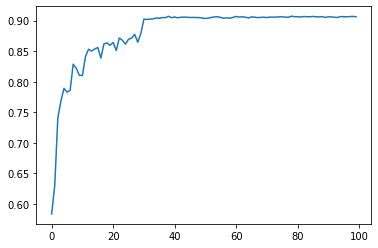

In [27]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels.to("cpu"), predicted_labels.to("cpu"))
print(f"Accuracy: {accuracy}")
plt.plot(accuracies)
plt.show()